In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [3]:
two_blobs_outlier = pd.read_csv('cluster_two_blobs_outliers.csv')
two_blobs_outlier.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

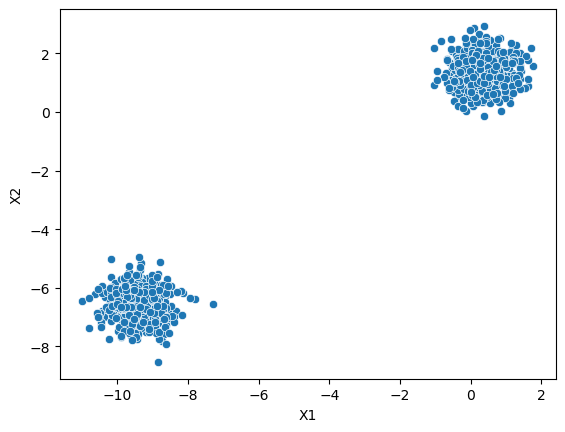

In [5]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

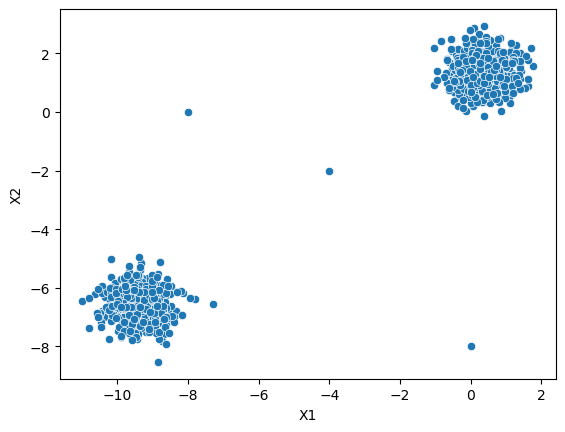

In [4]:
sns.scatterplot(data=two_blobs_outlier,x='X1',y='X2')

# Label Discovery

In [6]:
def display(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [9]:
dbscan = DBSCAN()

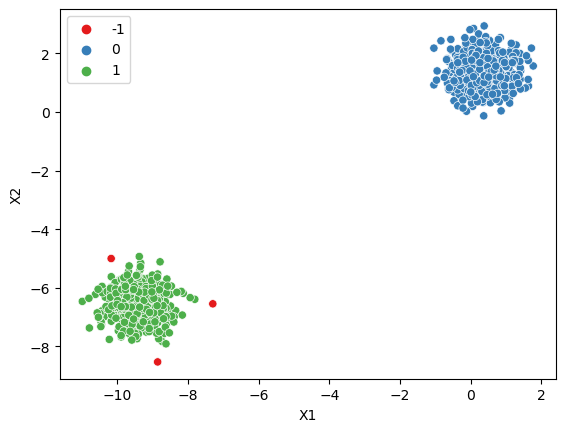

In [10]:
display(dbscan,two_blobs)

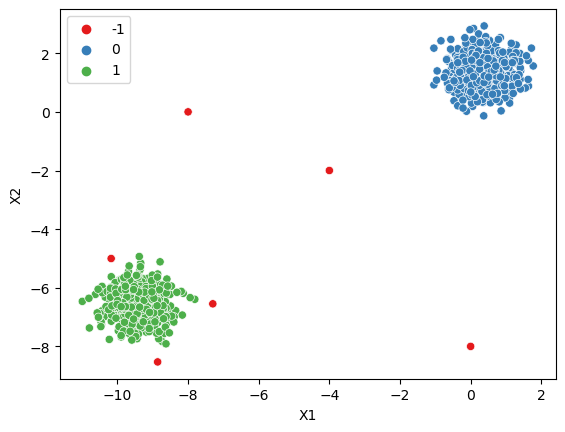

In [12]:
display(dbscan,two_blobs_outlier)

# Epsilon

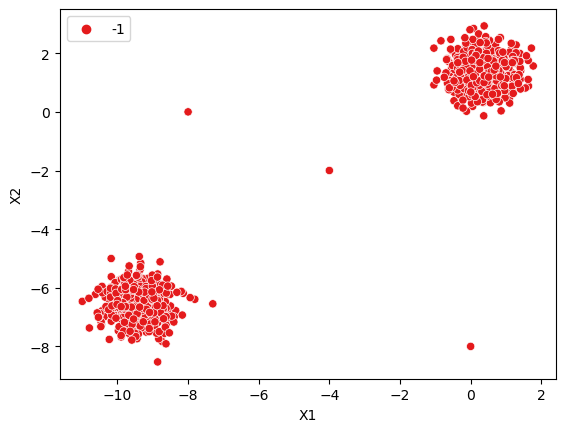

In [13]:
dbscan = DBSCAN(eps=0.001)
display(dbscan,two_blobs_outlier)

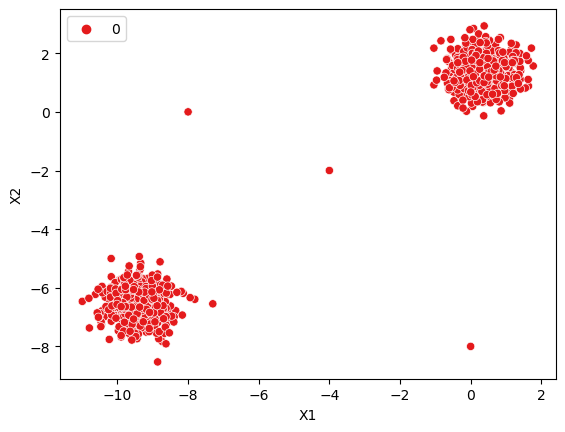

In [14]:
dbscan = DBSCAN(eps=100)
display(dbscan,two_blobs_outlier)

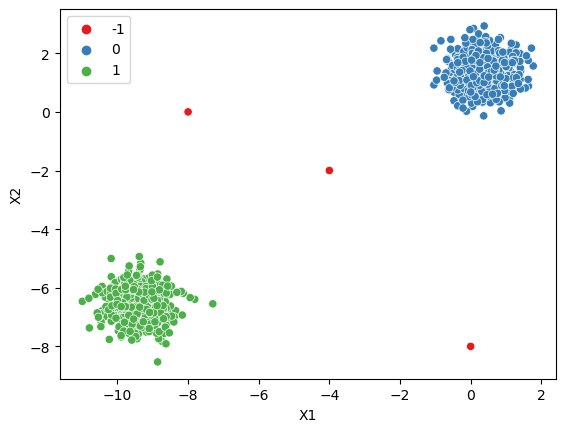

In [31]:
dbscan = DBSCAN(eps=0.7)
display(dbscan,two_blobs_outlier)

In [16]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [17]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [18]:
np.sum(dbscan.labels_ == -1)

3

In [20]:
100*np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)

0.29910269192422734

# Charting reasonable Epsilon Values

In [24]:
outlier_percent = []
no_of_outliers = []

for e in np.linspace(.001,10,100):
    
    #create model
    db_mod = DBSCAN(eps = e)
    db_mod.fit(two_blobs_outlier)
    
    #log number of outliers
    no_of_outliers.append(np.sum(db_mod.labels_ == -1))
    
    #log percentage of points that are outliers
    outlier_percent.append(100*np.sum(db_mod.labels_ == -1)/len(dbscan.labels_))

Text(0.5, 0, 'Epsilon Value')

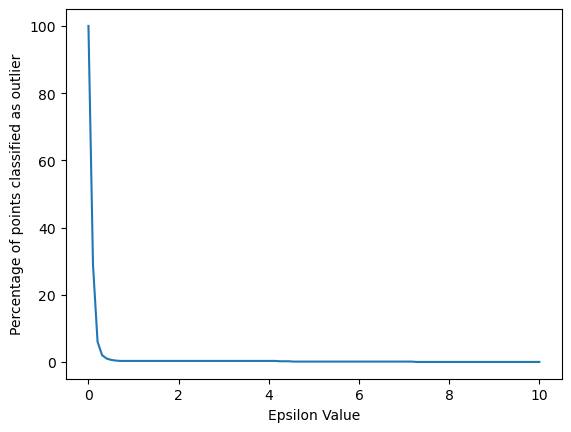

In [28]:
plt.plot(np.linspace(.001,10,100), outlier_percent)
plt.ylabel('Percentage of points classified as outlier')
plt.xlabel('Epsilon Value')

(0.0, 5.0)

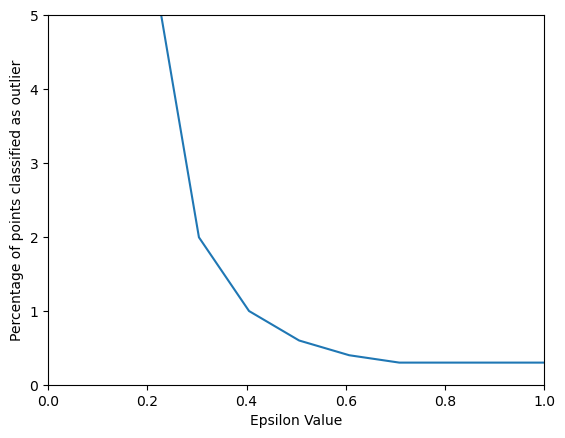

In [30]:
plt.plot(np.linspace(.001,10,100), outlier_percent)
plt.ylabel('Percentage of points classified as outlier')
plt.xlabel('Epsilon Value')
plt.xlim(0,1)
plt.ylim(0,5)

# Plotting in terms of number of ouliers instead

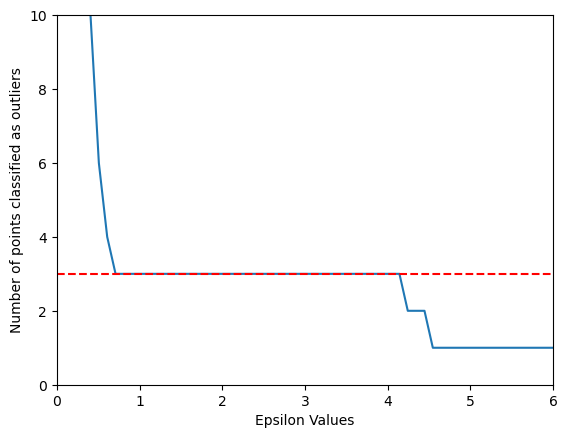

In [35]:
plt.plot(np.linspace(.001,10,100),no_of_outliers)
plt.ylabel('Number of points classified as outliers')
plt.xlabel('Epsilon Values')
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='r',ls='--')

# Minimum Samples

In [37]:
outlier_percent = []

for n in np.arange(1,100):
    
    #create model
    db_ms = DBSCAN(min_samples=n)
    db_ms.fit(two_blobs_outlier)
    
    outlier_percent.append(100*np.sum(db_ms.labels_ == -1)/len(dbscan.labels_))

Text(0.5, 0, 'min number of samples')

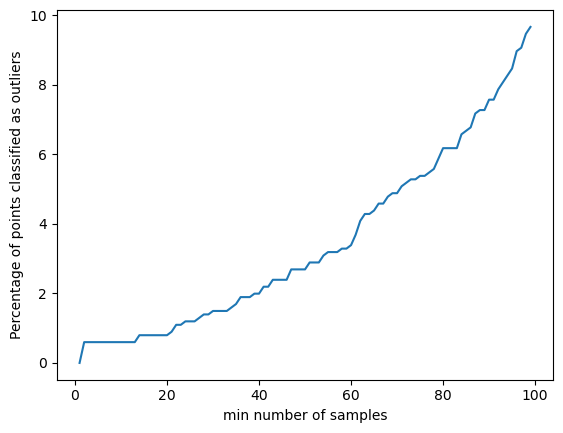

In [49]:
plt.plot(np.arange(1,100),outlier_percent)
plt.ylabel('Percentage of points classified as outliers')
plt.xlabel('min number of samples')
#plt.xlim(0, 2*two_blobs_outlier.shape[1])

* Points for min number of samples should be 2 times the number of dimensions of your data

In [50]:
num_dim = two_blobs_outlier.shape[1]

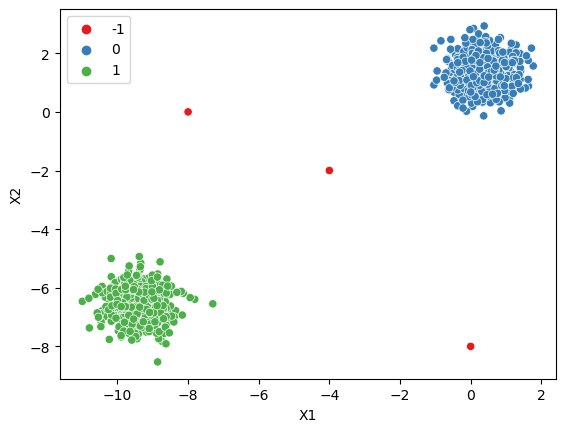

In [57]:
db_ms1 = DBSCAN(eps=0.7,min_samples=2*num_dim)
display(db_ms1,two_blobs_outlier)